# Лабораторная работа 10.9
## Вариант 2
## Сидельников Станислав Игоревич

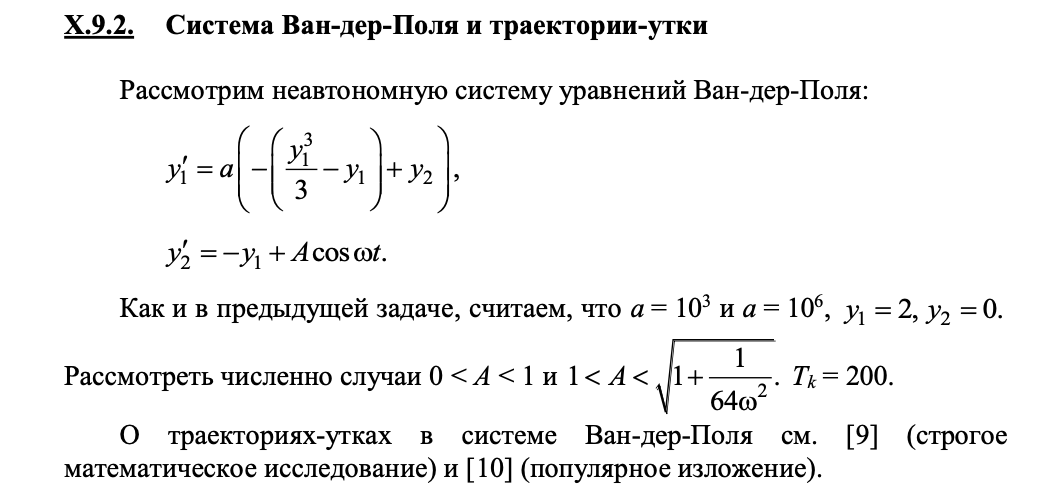

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math

В данной лабораторной работе исползуется неявный метод Рунге-Кутты, метод Эйлера с пересчетом 2-го порядка. Общий вид расчета такой: 

$ y_{n+1} = y_n + h \cdot (f(x_n, y_n) + \frac{f(x_{n+1}, y_{n+1})}{2}) $


## Задача начальных параметров и функций расчета из условия

In [102]:
y1_0 = 2
y2_0 = 0
a = 10 ** 3
max_time = 20  

def f_1(t, y1, y2):
    return a * (-(y1 ** 3 / 3 - y1) + y2)

def f_2(t, y1, y2):
    return - y1 + A * math.cos(w * t)


## Непосредственно функции реализации метода Рунге - Кутты

In [105]:


def evaluate(t, y1, y2, f_1, f_2, h):
    
    y1_ni = y1 + h * f_1(t, y1, y2)
    y2_ni = y2 + h * f_2(t, y1, y2)
    
    return y1_ni, y2_ni

def step(t, y1, y2, t_n, f_1, f_2, h, accuracy):
    
    y1_ni, y2_ni = evaluate(t, y1, y2, f_1, f_2, h)
    
    y1_n = y1 + h * (f_1(t, y1, y2) + f_1(t_n, y1_ni, y2_ni)) / 2
    y2_n = y2 + h * (f_2(t, y1, y2) + f_2(t_n, y1_ni, y2_ni)) / 2

    while math.sqrt((y1_n - y1_ni) ** 2 + (y2_n - y2_ni) ** 2) > accuracy:
        
        y1_ni = y1_n
        y2_ni = y2_n
        y1_n = y1 + h * (f_1(t, y1, y2) + f_1(t_n, y1_ni, y2_ni)) / 2
        y2_n = y2 + h * (f_2(t, y1, y2) + f_2(t_n, y1_ni, y2_ni)) / 2
        
    return y1_n, y2_n



## Варьирование параметра:

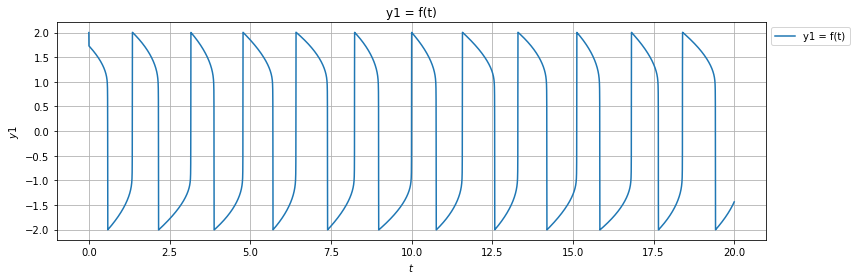

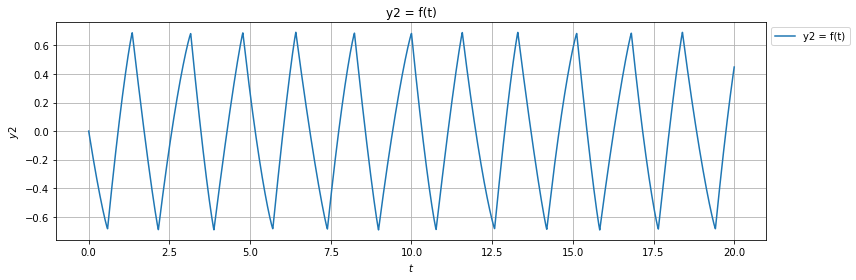

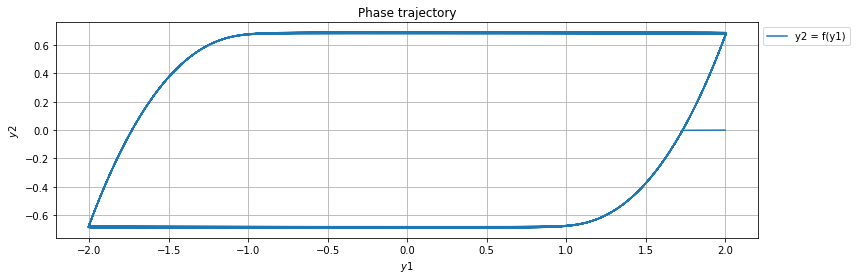

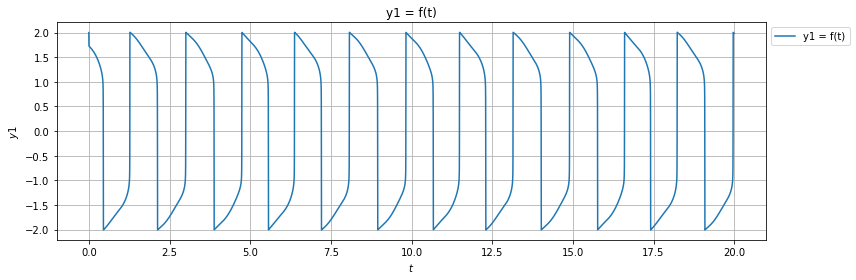

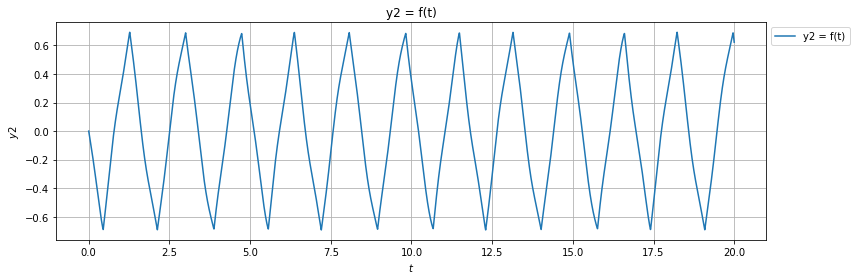

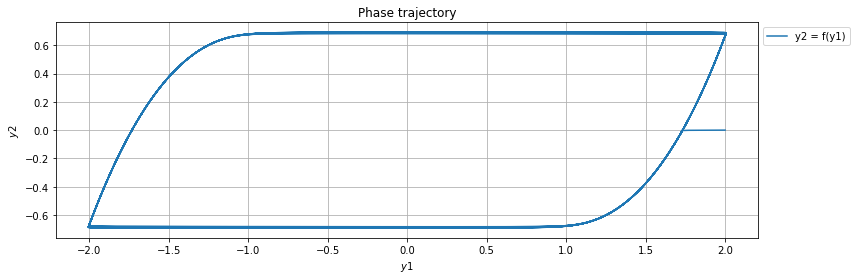

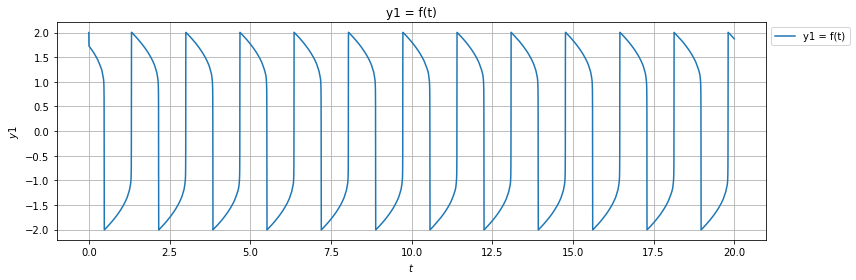

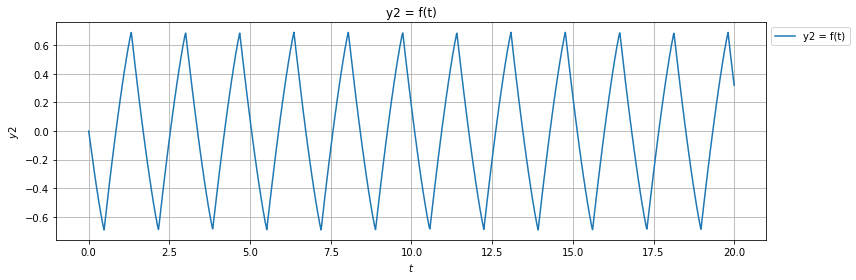

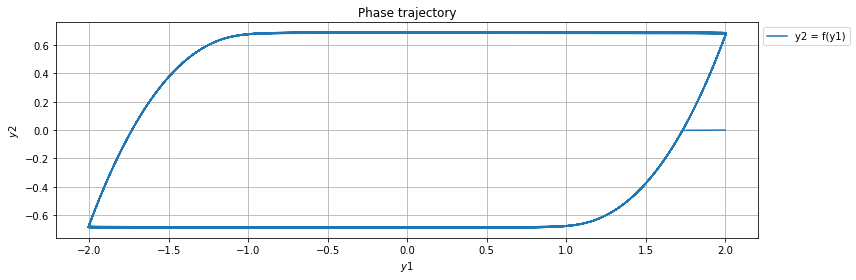

In [108]:

h = 0.0001
size = int(max_time / h + 1)


time = [0] * size
    
for i in range(size):
    time[i] = h * i

y1 = [0] * size
y1[0] = y1_0

y2 = [0] * size
y2[0] = y2_0
    

A = 0.3

# Варьируем w
for w_var in range(3):
    
    w = 10 ** w_var
    
    for i in range(size - 1):
        y1[i + 1], y2[i + 1] = step(time_array[i], y1[i], y2[i], time[i + 1], f_1, f_2, h, 0.001)

    # y1 = f(t)
    plt.figure(figsize=[12, 4])
    plt.plot(time, y1, label='y1 = f(t)')

    plt.title("y1 = f(t)")
    plt.xlabel("$t$")
    plt.ylabel("$y1$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    # y2 = f(t)
    plt.figure(figsize=[12, 4])
    plt.plot(time, y2, label='y2 = f(t)')

    plt.title("y2 = f(t)")
    plt.xlabel("$t$")
    plt.ylabel("$y2$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()

    # y2 = f(y1)
    plt.figure(figsize=[12, 4])
    plt.plot(y1, y2, label='y2 = f(y1)')

    plt.title("Phase trajectory")
    plt.xlabel("$y1$")
    plt.ylabel("$y2$")
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.tight_layout() 
    plt.show()